In [39]:
import pandas as pd
from sklearn.feature_extraction import FeatureHasher

In [40]:
dataTrain = pd.read_csv("datosNumericosTrain.csv")
dataTest = pd.read_csv("datosNumericosTest.csv")

In [41]:
dataTrain = dataTrain.drop('Unnamed: 0',1)
dataTest = dataTest.drop('Unnamed: 0',1)

In [42]:
dataTrain['Enero - cantidadEventos'].value_counts()

0     18827
1       282
2       105
3        69
4        34
5        31
6        20
7        12
8        10
11        4
19        3
16        3
14        2
9         2
10        2
13        2
15        2
24        1
21        1
18        1
12        1
Name: Enero - cantidadEventos, dtype: int64

In [43]:
dataTest.head()

,person,Enero_cantEventos,Febrero_cantEventos,Marzo_cantEventos,Abril_cantEventos,Mayo_cantEventos,Enero_checkouts,Febrero_checkouts,Marzo_checkouts,Abril_checkouts,...,Enero_accesos a la homepage,Febrero_accesos a la homepage,Marzo_accesos a la homepage,Abril_accesos a la homepage,Mayo_accesos a la homepage,Enero_listadosVisitados,Febrero_listadosVisitados,Marzo_listadosVisitados,Abril_listadosVisitados,Mayo_listadosVisitados
0,00091926,0,0,0,0,22,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00091a7a,0,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0,0,0,3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0
3,000e4d9e,0,0,0,0,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0
4,000e619d,0,0,0,0,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0


## Probando los labels numericos

In [44]:
#Para el de train
df1 = dataTrain.loc[:, dataTrain.columns.str.contains("Enero")] 
df2 = dataTrain.loc[:, dataTrain.columns.str.contains("Febrero")]
df3 = dataTrain.loc[:, dataTrain.columns.str.contains("Marzo")]
df4 = dataTrain.loc[:, dataTrain.columns.str.contains("Abril")]
df5 = dataTrain.loc[:, dataTrain.columns.str.contains("Mayo")]
labels = dataTrain.loc[:, dataTrain.columns.str.contains("label")]
persons = dataTrain.loc[:, dataTrain.columns.str.contains("person")]
trainSet = pd.concat([persons, df1, df2, df3, df4, df5, labels], axis=1, sort=False)
trainSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [45]:
#Para el de test
df1 = dataTest.loc[:, dataTest.columns.str.contains("Enero")] 
df2 = dataTest.loc[:, dataTest.columns.str.contains("Febrero")]
df3 = dataTest.loc[:, dataTest.columns.str.contains("Marzo")]
df4 = dataTest.loc[:, dataTest.columns.str.contains("Abril")]
df5 = dataTest.loc[:, dataTest.columns.str.contains("Mayo")]
persons = dataTest.loc[:, dataTest.columns.str.contains("person")]
testSet = pd.concat([persons, df1, df2, df3, df4, df5], axis=1, sort=False)
testSet.head()

,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,Mayo_checkouts,Mayo_leads,Mayo_conversiones,Mayo_staticPageVisitadas,Mayo_ProductosVistosPorUser,Mayo_productosBuscados,Mayo_accesos por marketing online,Mayo_searchEngine,Mayo_accesos a la homepage,Mayo_listadosVisitados
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,4.0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0


In [46]:
X = trainSet.iloc[:,:-1].values
y = trainSet['label'].values


In [47]:
T = testSet.iloc[:,:].values

#### Encoding de person

In [48]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Me creo una instancia de LabelEncoder para codificar a numero la variable person, la sintaxis es la siguiente:
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

# Debo utilizar onehotEncoder para evitar confundir a nuestro modelo, con solo labelEncoder puede pensar
# que una columna tiene datos con algún tipo de orden o jerarquía, cuando claramente no lo tiene
# Creo una instancia:
onehotencoder = OneHotEncoder(categorical_features = [1])
#Aplico la transformacion
X = onehotencoder.fit_transform(X).toarray()
X = X[:,0:]

In [49]:
#Me creo una instancia de LabelEncoder para codificar a numero la variable person, la sintaxis es la siguiente:
labelencoder_T = LabelEncoder()
T[:, 0] = labelencoder_T.fit_transform(T[:, 0])

# Debo utilizar onehotEncoder para evitar confundir a nuestro modelo, con solo labelEncoder puede pensar
# que una columna tiene datos con algún tipo de orden o jerarquía, cuando claramente no lo tiene
# Creo una instancia:
onehotencoder = OneHotEncoder(categorical_features = [1])
#Aplico la transformacion
T = onehotencoder.fit_transform(T).toarray()
T = T[:,0:]

### KNN

In [50]:
import numpy as np
from sklearn.model_selection import train_test_split
#Spliteo con shuffle=False es decir ordenado
X_train, X_test, y_train, y_test = train_test_split(\
 X, y, test_size=0.05,shuffle = False)

In [51]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)
# Entrenar( esto hace nada en KNN normal)
knn.fit(X_train, y_train)
# predecir la respuesta
pred = knn.predict(X_test)
# evaluar la exactitud
print("Precision del modelo")
print(accuracy_score(y_test, pred))

Precision del modelo
0.956745623069


In [52]:
predsss = knn.predict(T)
print("Prediccion")
predsss.mean()

Prediccion


0.00010301313417460727

### XGBoost

In [53]:
# Fitting XGBoost to the Training set
import xgboost
classifier = xgboost.XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [54]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [55]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [56]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.94773118397320599

In [57]:
# Predicting the Test set results
predFinalXGboost = classifier.predict(T)

In [58]:
predFinalXGboost.mean()

0.0012361576100952871

## Linear Regression

#### Visualizacion de datos sin muestrear


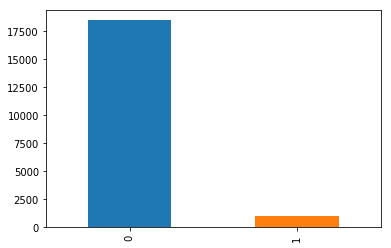

In [59]:
import matplotlib.pyplot as plt

trainSet['label'].value_counts().plot(kind= 'bar')

#### SubMuestreo o undersample

In [60]:
trainSet.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,Mayo - leads,Mayo - conversiones,Mayo - staticPageVisitadas,Mayo - ProductosVistosPorUser,Mayo - productosBuscados,Mayo - accesos por marketing online,Mayo - searchEngine,Mayo - accesos a la homepage,Mayo - listadosVisitados,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,8.0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [61]:
#GENERO PARAMETRO FEATURE HASHING
trainSet1=trainSet.iloc[:,:-1]
col=[]
columna='person'
cant_elem=trainSet1[columna].unique().size +1
#GENERO NOMBRE DE LAS COLUMNAS
for x in range(1,cant_elem+1):
    col.append("F_"+columna+"_fh"+str(x))
#APLICO FEATURE HASHING Y CONCATENO
fh = FeatureHasher(n_features=cant_elem, input_type='string')
sp = fh.fit_transform(trainSet1[columna])
sp=sp.toarray().astype('int8')
df = pd.DataFrame(sp, columns=col)
df.reset_index(drop=True, inplace=True)
trainSet1.reset_index(drop=True, inplace=True)
#TODA LA DATA JUNTA
nuevoX1=pd.concat([trainSet1, df], axis=1)
nuevoX1.head()

,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,F_person_fh19406,F_person_fh19407,F_person_fh19408,F_person_fh19409,F_person_fh19410,F_person_fh19411,F_person_fh19412,F_person_fh19413,F_person_fh19414,F_person_fh19415
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
#GENERO PARAMETRO FEATURE HASHING
col=[]
columna='person'
#cant_elem=testSet[columna].unique().size +1
#GENERO NOMBRE DE LAS COLUMNAS
for x in range(1,cant_elem+1):
    col.append("F_test_"+columna+"_fh"+str(x))
#APLICO FEATURE HASHING Y CONCATENO
fh = FeatureHasher(n_features=cant_elem, input_type='string')
sp = fh.fit_transform(testSet[columna])
sp=sp.toarray().astype('int8')
df = pd.DataFrame(sp, columns=col)
df.reset_index(drop=True, inplace=True)
testSet.reset_index(drop=True, inplace=True)
#TODA LA DATA JUNTA
nuevotestSet1=pd.concat([testSet, df], axis=1)
nuevotestSet1.head()

,person,Enero_cantEventos,Enero_checkouts,Enero_leads,Enero_conversiones,Enero_staticPageVisitadas,Enero_ProductosVistosPorUser,Enero_productosBuscados,Enero_accesos por marketing online,Enero_searchEngine,...,F_test_person_fh19406,F_test_person_fh19407,F_test_person_fh19408,F_test_person_fh19409,F_test_person_fh19410,F_test_person_fh19411,F_test_person_fh19412,F_test_person_fh19413,F_test_person_fh19414,F_test_person_fh19415
0,00091926,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,00091a7a,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,000ba417,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,000e4d9e,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,000e619d,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
nuevoX1['label']=trainSet['label']
print nuevoX1.shape
nuevoX1.head()

(19414, 19472)


,person,Enero - cantidadEventos,Enero - checkouts,Enero - leads,Enero - conversiones,Enero - staticPageVisitadas,Enero - ProductosVistosPorUser,Enero - productosBuscados,Enero - accesos por marketing online,Enero - searchEngine,...,F_person_fh19407,F_person_fh19408,F_person_fh19409,F_person_fh19410,F_person_fh19411,F_person_fh19412,F_person_fh19413,F_person_fh19414,F_person_fh19415,label
0,0008ed71,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,000c79fe,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,001802e4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0019e639,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,001b0bf9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
#1.Encuentra el número de muestras que son conversiones
sizeConversiones = len(nuevoX1[nuevoX1['label'] == 1])

In [65]:
#2. Obtener índices de muestras de no conversiones.
no_conversiones_indices = nuevoX1[nuevoX1.label == 0].index 

In [66]:
#Muestras aleatorias de índices de no conversiones.
random_indices_no_conversiones = np.random.choice(no_conversiones_indices,sizeConversiones, replace=False)

In [67]:
#4. Encuentra los índices de muestras de conversiones.
conversiones = nuevoX1[nuevoX1.label == 1].index

In [68]:
#5. Índices de conversiones concat con muestras de no conversiones.
under_sample_indices = np.concatenate([conversiones,random_indices_no_conversiones])

In [69]:
#6 Obtener Balance Dataframe
under_sample = nuevoX1.loc[under_sample_indices]

In [70]:
under_sample = under_sample.sort_values(by='person')

#### Visualización de datos submuestreados

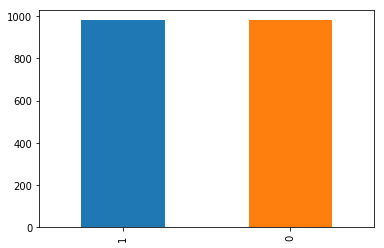

In [71]:
under_sample['label'].value_counts().plot(kind='bar')

### Ejecución de regresión logística en datos submuestreados

In [72]:
under_sample.shape

(1960, 19472)

In [73]:
#nuevotestSet1
T = nuevotestSet1.iloc[:,1:].values
T.shape

(19415L, 19470L)

In [75]:
X_under = under_sample.iloc[:,:-1]
X_under = X_under.iloc[:,1:].values
y_under = under_sample['label'].values
X_under.shape

(1960L, 19470L)

In [80]:
T.shape

(19415L, 19470L)

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
#Spliteo con shuffle=False es decir ordenado
X_under_train, X_under_test, y_under_train, y_under_test =\
train_test_split(X_under,y_under,test_size = 0.4,shuffle = False)

In [77]:
from sklearn.linear_model import LogisticRegression
lr_under = LogisticRegression()
lr_under.fit(X_under_train,y_under_train)
y_under_pred = lr_under.predict(X_under_test)

In [78]:
from sklearn.metrics import recall_score
print(recall_score(y_under_test,y_under_pred))
print(accuracy_score(y_under_test,y_under_pred))

0.734848484848
0.758928571429


In [82]:
T_predict=lr_under.predict(T)

In [83]:
T_predict.mean()

0.26175637393767703

In [ ]:
#print(recall_score(y_under_test,T_predict))
#print(accuracy_score(y_under_test,T_predict))